### <font color = Purple>"Lead Scoring Case Study by Sonal Hedaoo and Rahul Chopra"
    
### <font color = Brown>Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

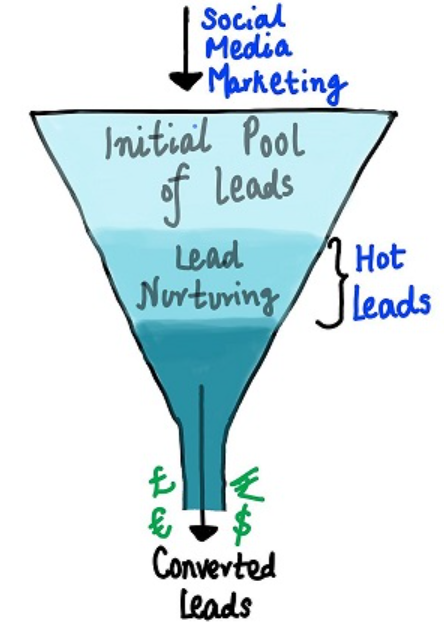

##### Goal - The company requires a model that will assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


Conversion Rate = (Probability of the person becoming a customer of X Education * 100)%

Lead Score = Probability of the person becoming a customer of X Education * 100

- <font color = Purple>Steps that we are going to follow to approach this problem are:

<font color = black>
    
    A.Reading the Data
    
    B.Data Preparation

    C.EDA
    
    D.Dummy Variable Creation
    
    E.Test-Train Split
    
    F.Feature Scaling
    
    G.Checking Correlation
    
    H.Model Building
    
    I.Model Evaluation 
    
    J.Conclusion





### <font color = Brown> Import Important Libraries

In [1]:
#import basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#for data modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

pd.set_option("display.max_columns", 50)

%matplotlib inline

### <font color = Brown>A. Reading the Data

In [2]:
#importing and understanding the data

df_leads = pd.read_csv('Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the shape

df_leads.shape

(9240, 37)

In [4]:
#checking summary

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#checking Duplicates

df_leads.duplicated().sum()

0

In [6]:
#checking all the columns

df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
#checking datatypes

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#checking the missing data percentage in the dataset

round(df_leads.isna().sum()/df_leads.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

We can observed that:
* A lot of null values present in the columns which needs to be dropped.
* There are categorical variables as well present in the dataset, so will need to Encode them.
* There are no duplicates present in the dataset
* We need to convert the Select into NaN value

### <font color = Brown>B. Data Preparation

In [9]:
#Data cleaning and preparation

#Encoding the lables with Yes/No to 1s/0s

for feature in ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
                'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                'A free copy of Mastering The Interview']:
    
    df_leads[feature] = df_leads[feature].apply(lambda x : 1 if x == 'Yes' else 0)

In [10]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [11]:
#converting SELECT into NaN:
#categorical variable list
df_leads.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [12]:
#checking the lables of remaining categorical columns

for column in df_leads.iloc[:,1:].select_dtypes(include='object').columns:
    print(column)
    print('*******************************************************************************')
    print(df_leads[column].value_counts(normalize=True))
    print('*******************************************************************************')

Lead Origin
*******************************************************************************
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
*******************************************************************************
Lead Source
*******************************************************************************
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
WeLearn              0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
blog        

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64
*******************************************************************************
Asymmetrique Activity Index
*******************************************************************************
02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64
*******************************************************************************
Asymmetrique Profile Index
*******************************************************************************
02.Medium    0.555157
01.High      0.438670
03.Low       0.006173
Name: Asymmetrique Profile Index, dtype: float64
*******************************************************************************
Last No

In [13]:
#Converting Selects into NaNs

df_leads = df_leads.replace('Select', np.nan)
df_leads.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
#checking the missing data percentage in the dataset

round(df_leads.isna().sum()/df_leads.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
How did you hear about X Education               0.78
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [15]:
#Missing Value handling
#Dropping the column having more than 40% null values

df_leads = df_leads.drop(df_leads.loc[: , list(round(df_leads.isnull().sum()/df_leads.shape[0],2)>0.40)].columns, 1)

In [16]:
#inspecting new dataframe
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [17]:
#inspecting remaining columns
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
#checking the missing data percentage in the dataset again

round(df_leads.isna().sum()/df_leads.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.37
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [19]:
#There are a few columns with missing values still remaining and we will inspect those now, starting with Country.
df_leads.Country.value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Nigeria                  0.043290
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Germany                  0.043290
Sweden                   0.032468
Ghana                    0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Belgium                  0.021645
Netherlands              0.021645
Bangladesh               0.021645
Italy                    0.021645
China                    0.021645
Uganda                   0.021645
Malaysia      

In [20]:
#Since the data in country column seems to be quite skewed, with India having 70% value counts and 26% missing, hence we will drop this column
df_leads.drop('Country', axis = 1, inplace = True)

In [21]:
#Checking the column "What matters most to you in choosing a course" next
df_leads["What matters most to you in choosing a course"].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [22]:
#Again it is visibile that the values in this column are heavily skewed and hence, should be dropped.
df_leads.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [23]:
#Checking the column "What is your current occupation" next
df_leads["What is your current occupation"].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [24]:
#This column is highly skewed as well as majority of values are for unemployed or missing. Hence, we'll drop this column
df_leads.drop('What is your current occupation', axis = 1, inplace = True)

In [25]:
#Checking the column "Specialization" next
df_leads["Specialization"].value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [26]:
#Since there are a lot of levels in the data with less proportion of value counts, we will club the data into broader categories based on domain similiarity
# Management Specialization
df_leads.loc[(df_leads.Specialization == 'Finance Management') | (df_leads.Specialization == 'Human Resource Management') | 
       (df_leads.Specialization == 'Marketing Management') |  (df_leads.Specialization == 'Operations Management') |
       (df_leads.Specialization == 'IT Projects Management') | (df_leads.Specialization == 'Supply Chain Management') |
       (df_leads.Specialization == 'Healthcare Management') | (df_leads.Specialization == 'Hospitality Management') |
       (df_leads.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# Business Specialization
df_leads.loc[(df_leads.Specialization == 'Banking, Investment And Insurance') | (df_leads.Specialization == 'Business Administration') | (df_leads.Specialization == 'International Business') | 
       (df_leads.Specialization == 'Rural and Agribusiness') | (df_leads.Specialization == 'E-Business') , 'Specialization'] = 'Business Specializations'

# Services Specialization
df_leads.loc[(df_leads.Specialization == 'Media and Advertising') | (df_leads.Specialization == 'Travel and Tourism') | (df_leads.Specialization == 'Services Excellence') | (df_leads.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Services Specializations'

In [27]:
#Inspecting the column "Specialization" again
df_leads["Specialization"].value_counts(normalize = True, dropna = False) * 100

Management Specializations    46.028139
NaN                           36.580087
Business Specializations      11.352814
Services Specializations       6.038961
Name: Specialization, dtype: float64

In [28]:
#Imputing missing values of Specialization with mode as it is categorical in nature
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan,'Management Specializations')

In [29]:
#Inspecting the column "Specialization" again
df_leads["Specialization"].value_counts(normalize = True, dropna = False) * 100

Management Specializations    82.608225
Business Specializations      11.352814
Services Specializations       6.038961
Name: Specialization, dtype: float64

In [30]:
#Checking the column "City" next
df_leads["City"].value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [31]:
#Checking the column "Tags"
df_leads["Tags"].value_counts(normalize = True, dropna = False) * 100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [32]:
#impute NaN with 'Will revert after' for Tags as 30% of data is will revert after reading the mail

df_leads['Tags'] = df_leads['Tags'].replace(np.nan,'Will revert after')

#most of the values for City column belongs to Mumbai, So impute NaN with Mumbai

df_leads['City'] = df_leads['City'].replace(np.nan,'Mumbai')

In [33]:
#Replacing all the negligible categories for Tags column to Others 

df_leads['Tags']=df_leads['Tags'].replace(['Lost to EINS','Not doing further education','Interested  in full time MBA',
                                          'Graduation in progress','invalid number','Diploma holder (Not Eligible)', 
                                          'wrong number given','opp hangup','number not provided',
                                          'in touch with EINS','Lost to Others','Want to take admission but has financial problems',
                                          'Still Thinking', 'Interested in Next batch','In confusion whether part time or DLP',
                                        'Lateral student','Shall take in the next coming month',
                                          'University not recognized','Recognition issue (DEC approval)'],'Other_Tags')

In [34]:
#Checking the column "Tags" again
df_leads["Tags"].value_counts(normalize = True, dropna = False) * 100

Will revert after                      36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Other_Tags                              9.199134
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Name: Tags, dtype: float64

In [35]:
#After updating the Dataset inspecting the missing data percentage

round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [36]:
#Dropping the remaining rows directly containing missing values

df_leads.dropna(inplace=True)
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Management Specializations,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Management Specializations,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Specializations,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Services Specializations,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Management Specializations,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


#### Handling remaining columns with data imbalance that are binary in nature

In [37]:
#CHecking columns again
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
# Creating new dataframe with binary columns
binary = df_leads[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations']]

# see value counts for each of the columns
for i in binary.columns:
    x = (binary[i].value_counts(normalize = True)) * 100
    print(x)
    print()

0    92.109323
1     7.890677
Name: Do Not Email, dtype: float64

0    99.977959
1     0.022041
Name: Do Not Call, dtype: float64

0    99.845713
1     0.154287
Name: Search, dtype: float64

0    99.977959
1     0.022041
Name: Newspaper Article, dtype: float64

0    99.98898
1     0.01102
Name: X Education Forums, dtype: float64

0    99.98898
1     0.01102
Name: Newspaper, dtype: float64

0    99.955918
1     0.044082
Name: Digital Advertisement, dtype: float64

0    99.922857
1     0.077143
Name: Through Recommendations, dtype: float64



In [39]:
#As all these columns are highly skewed, we'll continue to drop them
df_leads.drop(binary, axis = 1, inplace = True)

In [40]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Converted                                 9074 non-null   int64  
 5   TotalVisits                               9074 non-null   float64
 6   Total Time Spent on Website               9074 non-null   int64  
 7   Page Views Per Visit                      9074 non-null   float64
 8   Last Activity                             9074 non-null   object 
 9   Specialization                            9074 non-null   object 
 10  Magazine                            

In [41]:
# determine the numeric columns that are having unique values
for k, v in df_leads.select_dtypes(include='int64').nunique().to_dict().items():
    print('{} = {} levels'.format(k,v))

Lead Number = 9074 levels
Converted = 2 levels
Total Time Spent on Website = 1717 levels
Magazine = 1 levels
Receive More Updates About Our Courses = 1 levels
Update me on Supply Chain Content = 1 levels
Get updates on DM Content = 1 levels
I agree to pay the amount through cheque = 1 levels
A free copy of Mastering The Interview = 2 levels


In [42]:
#We will drop the columns having just 1 level as these are not adding any valuable information
df_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [43]:
#We shall also be dropping Tags column as it is sales team generated and not part of the original data
df_leads.drop('Tags', axis =1,inplace=True)

In [44]:
df_leads.shape

(9074, 13)

In [45]:
#Finally based on logical understanding, we will be dropping prospect id and lead number as these are unique values with no signifance 
df_leads.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [46]:
print(f"{round(len(df_leads)/9240*100,2)}% data has been retained")

98.2% data has been retained


We can observed that:

* 98.2% of the data has been retained after the data cleaning

### <font color = Brown>C. Exploratory Data Analysis

In [47]:
#checking the data is imbalance or not by checking the target variables 

df_leads['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

Looking at above data , we are good to go further

In [48]:
#importing style from matplotlib
from matplotlib import style
style.use('ggplot')

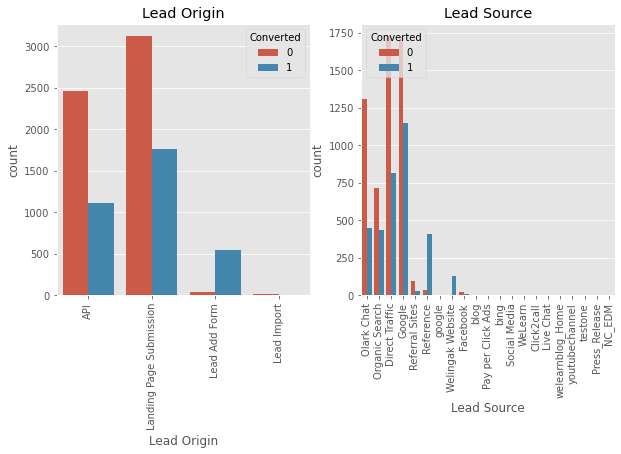

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()


We can observed from above plot that:

* We can ignore the Lead import as it has very less conversion rate as well as very less count.
* The conversion rate of Lead Add Form is hight as compared to it's count which is quite low.
* API and Landing Page Submission has less conversion rate as compared to count.

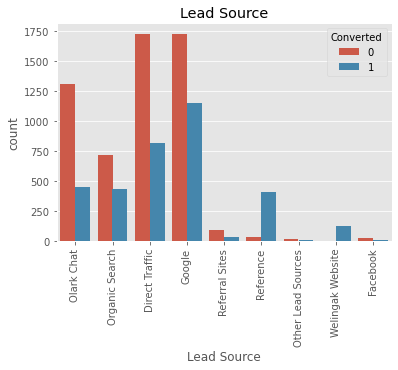

In [50]:
#for better visualization for Lead Source analysis we are replacing the negligible leads with less count and less conversion rate to others

df_leads['Lead Source'] = df_leads['Lead Source'].replace(['NC_EDM','Press_Release','testone','youtubechannel','welearnblog_Home',
                            'Live Chat','Click2call','WeLearn','Social Media','bing','Pay per Click Ads','blog','google'], 'Other Lead Sources')

#plot Lead Source

sns.countplot(x='Lead Source', hue='Converted', data= df_leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

We can observed from above plot that:

* The conversion rate of Welingak Website and Reference is more.
* The count rate of Google and Direct Traffic is more.


**Checking for conversion for numerical values

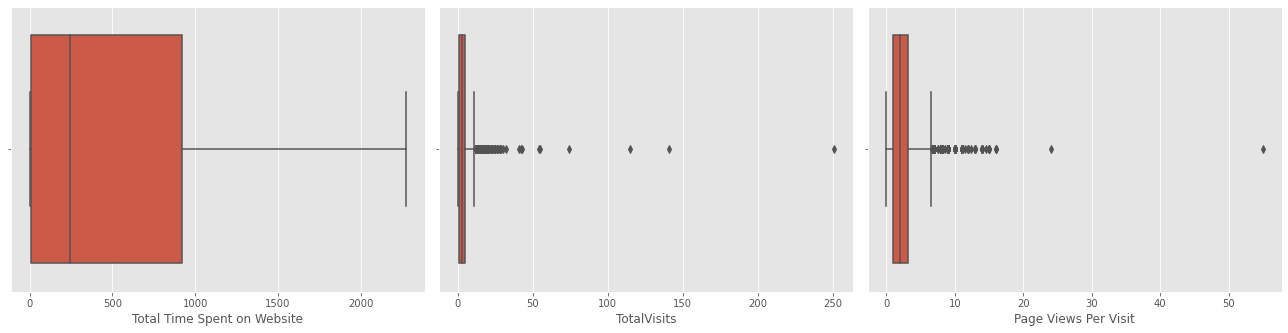

In [51]:
#Visualizing Total Time Spent on Website, TotalVisits, Page Views Per Visit


plt.figure(figsize=(18,18))
plt.subplot(431)
sns.boxplot(df_leads['Total Time Spent on Website'])

plt.subplot(432)
sns.boxplot(df_leads['TotalVisits'])

plt.subplot(433)
sns.boxplot(df_leads['Page Views Per Visit'])

plt.tight_layout()
plt.show()


We can observed that TotalVisits and Page Views Per Visit has outliers.

In [52]:
#Handling Outliers of TotalVisits and Page Views Per Visit by 97%

q1 = df_leads['TotalVisits'].quantile(0.97)
df_leads['TotalVisits'][df_leads['TotalVisits'] >= q1] = q1

q1 = df_leads['Page Views Per Visit'].quantile(0.97)
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= q1] = q1

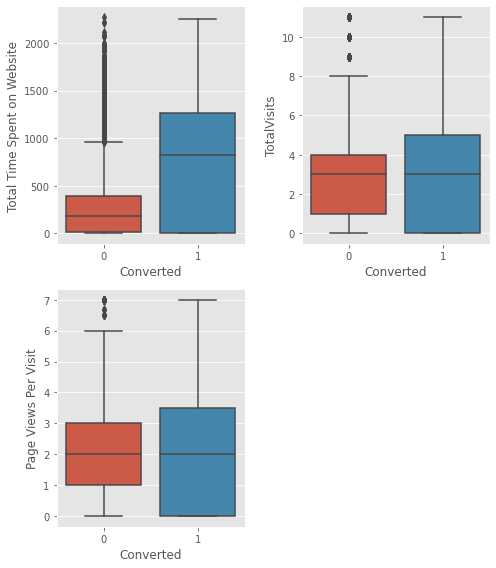

In [53]:
fig=plt.subplots(figsize=(7,8))

for i, feature in enumerate(['Total Time Spent on Website','TotalVisits','Page Views Per Visit']):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(y=feature, x='Converted', data=df_leads)
    plt.tight_layout()

We can observed that:
* The user spending more time on the website have high conversion rate in .
* Median for both the Converted and not converted leads are almost same in TotalVisits.

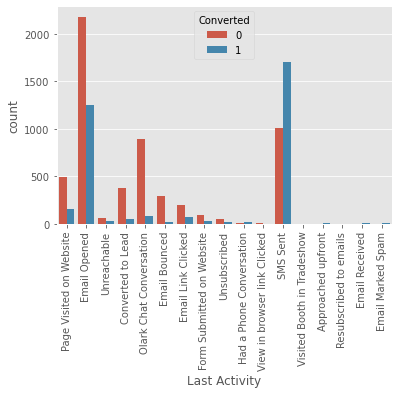

In [54]:
#Visualizing the Last Activity

plt.xticks(rotation='vertical')
sns.countplot(x='Last Activity' , hue='Converted', data=df_leads)
plt.show()


We can observed from above plot that the Conversion rate for Email Opened is Highest and The Count for SMS Sent is Highest as compared to others activities.

In [55]:
# Checking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [56]:
df_leads.shape

(9074, 11)

In [57]:
len(df_leads.index)/9074


1.0

We can observed that the missing values are handled and few columns are dropped.

### <font color = Brown>D. Dummy Variable Creation

In [58]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   City                                    9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   int64  
 10  Last Notable Activity                   9074 non-null   obje

In [59]:
dummy = pd.get_dummies(df_leads[['Lead Origin','Lead Source','Last Activity','Specialization','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Management Specializations,Specialization_Services Specializations,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
df_leads = df_leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','City','Last Notable Activity'], axis=1)
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0.0,0,0.0,0
1,0,5.0,674,2.5,0
2,1,2.0,1532,2.0,1
3,0,1.0,305,1.0,0
4,1,2.0,1428,1.0,0


In [61]:
df_leads = pd.concat([df_leads , dummy], axis = 1)
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Management Specializations,Specialization_Services Specializations,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### <font color = Brown>E. Test-Train Split

In [62]:
#putting feature variable to X and response variable to y

X = df_leads.drop('Converted', axis=1)
y = df_leads['Converted']

print(y)
X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Management Specializations,Specialization_Services Specializations,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
#Splitting the Dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### <font color = Brown>F. Feature Scaling

In [64]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                    'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Management Specializations,Specialization_Services Specializations,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.431325,-0.160255,-0.167996,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.431325,-0.540048,-0.167996,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.124566,-0.888650,-1.227814,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.431325,1.643304,-0.167996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.608537,2.017593,0.096958,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
#Conversion Rate

Conversion = sum(df_leads['Converted']/len(df_leads['Converted'].index))*100
print(Conversion)

37.85541106457747


So we can see that the Conversion rate is 37.8%, i.e. about 37 out of 100 leads that are generated convert into customers.

### <font color = Brown>G. Checking Correlation

In [66]:
#correlation b/wn numerical variables

corr = df_leads.corr()

#finding top 15 correlations

corr_unstacked = corr.unstack().sort_values(kind='quicksort')
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(15)

Last Activity_Resubscribed to emails    Last Notable Activity_Resubscribed to emails      1.000000
Last Activity_Email Marked Spam         Last Notable Activity_Email Marked Spam           1.000000
Lead Origin_Lead Import                 Lead Source_Facebook                              0.983684
Last Activity_Unsubscribed              Last Notable Activity_Unsubscribed                0.872656
Lead Origin_Lead Add Form               Lead Source_Reference                             0.866191
Last Activity_Email Opened              Last Notable Activity_Email Opened                0.861636
Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                    0.853102
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked          0.800686
TotalVisits                             Page Views Per Visit                              0.755385
Last Activity_Had a Phone Conversation  Last Notable Activity_Had a Phone Conversation    0.747877
Last Activ

In [67]:
#Dropping highly correlated dummies

X_test = X_test.drop(['Last Notable Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails',
   'Lead Source_Facebook','Last Notable Activity_Unsubscribed', 'Last Notable Activity_Email Opened',
   'Last Notable Activity_SMS Sent','Lead Source_Reference', 'Lead Origin_Landing Page Submission',
   'Last Notable Activity_Email Link Clicked','Last Notable Activity_Had a Phone Conversation',
   'Last Notable Activity_Email Received','Last Notable Activity_Unreachable','Last Notable Activity_Page Visited on Website'], 1)

X_train = X_train.drop(['Last Notable Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails',
   'Lead Source_Facebook','Last Notable Activity_Unsubscribed', 'Last Notable Activity_Email Opened',
   'Last Notable Activity_SMS Sent','Lead Source_Reference', 'Lead Origin_Landing Page Submission',
   'Last Notable Activity_Email Link Clicked','Last Notable Activity_Had a Phone Conversation',
   'Last Notable Activity_Email Received','Last Notable Activity_Unreachable','Last Notable Activity_Page Visited on Website'], 1)

In [68]:
corr = X_train.corr()

In [69]:
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(15)

TotalVisits                                 Page Views Per Visit                                  0.755504
Lead Origin_Lead Add Form                   Lead Source_Welingak Website                          0.468225
Last Activity_Email Bounced                 Last Notable Activity_Email Bounced                   0.450911
Lead Source_Olark Chat                      Last Activity_Olark Chat Conversation                 0.419173
Last Activity_View in browser link Clicked  Last Notable Activity_View in browser link Clicked    0.408088
Last Activity_Olark Chat Conversation       Last Notable Activity_Olark Chat Conversation         0.406150
Total Time Spent on Website                 Page Views Per Visit                                  0.348810
TotalVisits                                 Total Time Spent on Website                           0.342757
Last Activity_Olark Chat Conversation       Last Notable Activity_Modified                        0.328700
Page Views Per Visit                 

### <font color = Brown>H. Model Building

#### Logistics Regression Model

In [70]:
#We will be using a mixed hybrid approach where we will automate feautre elimination and then proceed to do it manually using p values and VIF analysis

#Starting with RFE for 15 variables

#initiating logistic regression
lr = LogisticRegression()

#running RFE
rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)

In [71]:
rfe.support_

array([False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False])

In [72]:
# Checking ranking and supported columns with RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Other Lead Sources', False, 8),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Marked Spam', False, 19),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Email Received', True, 1),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Ac

In [73]:
#Creating a new dataframe for supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'City_Tier II Cities', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [74]:
#inspecting columns not selected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Lead Sources',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Management Specializations',
       'Specialization_Services Specializations', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='o

In [75]:
#Building the First Model
X_train_sm = sm.add_constant(X_train[col])
log1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.8
Date:                Wed, 12 Jan 2022   Deviance:                       5689.5
Time:                        21:20:51   Pearson chi2:                 6.60e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0077      0.054    -18.787      0.000      -1.113      -0.903
Total Time Spent on Website                       1.1484      0.039     29.381      0.000       1.072       1.225
Lead Origin_Lead Add Form                         4.1752      0.216     19.337      0.000       3.752       4.598
Lead Origin_Lead Import                           1.5264      0.434      3.519      0.000       0.676       2.376
Lead Source_Olark Chat                            1.1923      0.100     11.922      0.000       0.996       1.388
Lead Source_Welingak Website                      1.4924      0.752      1.985      0.047       0.019       2.966
Last Activity_Converted to Lead                  -0.5146      0.220     -2.341      0.019      -0.945      -0.084
Last Activity_Email Bounced                      -1.8924      0.373     -5.079      0.000      -2.623      -1.162
Last Activity_Email Received                     21.9173   2.06e+04      0.001      0.999   -4.04e+04    4.04e+04
Last Activity_Had a Phone Conversation            2.6501      0.695      3.815      0.000       1.289       4.012
Last Activity_Olark Chat Conversation            -0.8707      0.189     -4.615      0.000      -1.240      -0.501
Last Activity_Resubscribed to emails             22.4020   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_SMS Sent                            1.1366      0.071     15.928      0.000       0.997       1.276
City_Tier II Cities                              -0.5656      0.413     -1.368      0.171      -1.376       0.245
Last Notable Activity_Modified                   -0.8981      0.084    -10.665      0.000      -1.063      -0.733
Last Notable Activity_Olark Chat Conversation    -0.7579      0.357     -2.123      0.034      -1.457      -0.058
=================================================================================================================
"""

In [76]:
#It is evident that Last Activity_Resubscribed to emails has the higesht P value and we'll be dropping this first
col = col.drop('Last Activity_Resubscribed to emails',1)

In [77]:
#Building the Second Model
X_train_sm = sm.add_constant(X_train[col])
log2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Wed, 12 Jan 2022   Deviance:                       5691.9
Time:                        21:20:52   Pearson chi2:                 6.60e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0069      0.054    -18.777      0.000      -1.112      -0.902
Total Time Spent on Website                       1.1483      0.039     29.379      0.000       1.072       1.225
Lead Origin_Lead Add Form                         4.1751      0.216     19.336      0.000       3.752       4.598
Lead Origin_Lead Import                           1.5259      0.434      3.518      0.000       0.676       2.376
Lead Source_Olark Chat                            1.1966      0.100     11.972      0.000       1.001       1.392
Lead Source_Welingak Website                      1.4926      0.752      1.985      0.047       0.019       2.966
Last Activity_Converted to Lead                  -0.5145      0.220     -2.341      0.019      -0.945      -0.084
Last Activity_Email Bounced                      -1.8933      0.373     -5.081      0.000      -2.624      -1.163
Last Activity_Email Received                     20.9170   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Last Activity_Had a Phone Conversation            2.6496      0.695      3.814      0.000       1.288       4.011
Last Activity_Olark Chat Conversation            -0.8734      0.189     -4.630      0.000      -1.243      -0.504
Last Activity_SMS Sent                            1.1353      0.071     15.913      0.000       0.996       1.275
City_Tier II Cities                              -0.5655      0.413     -1.368      0.171      -1.376       0.245
Last Notable Activity_Modified                   -0.8989      0.084    -10.676      0.000      -1.064      -0.734
Last Notable Activity_Olark Chat Conversation    -0.7586      0.357     -2.126      0.034      -1.458      -0.059
=================================================================================================================
"""

In [78]:
#Since Last Activity_Email Received has a high p value, we woll be dropping this feature
col = col.drop('Last Activity_Email Received',1)

In [79]:
#Building the Third Model
X_train_sm = sm.add_constant(X_train[col])
log3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.7
Date:                Wed, 12 Jan 2022   Deviance:                       5695.4
Time:                        21:20:52   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0051      0.054    -18.752      0.000      -1.110      -0.900
Total Time Spent on Website                       1.1491      0.039     29.399      0.000       1.072       1.226
Lead Origin_Lead Add Form                         4.1739      0.216     19.333      0.000       3.751       4.597
Lead Origin_Lead Import                           1.5247      0.434      3.516      0.000       0.675       2.375
Lead Source_Olark Chat                            1.1960      0.100     11.969      0.000       1.000       1.392
Lead Source_Welingak Website                      1.4930      0.752      1.986      0.047       0.019       2.967
Last Activity_Converted to Lead                  -0.5190      0.220     -2.361      0.018      -0.950      -0.088
Last Activity_Email Bounced                      -1.8966      0.373     -5.090      0.000      -2.627      -1.166
Last Activity_Had a Phone Conversation            2.6470      0.695      3.811      0.000       1.286       4.009
Last Activity_Olark Chat Conversation            -0.8767      0.189     -4.649      0.000      -1.246      -0.507
Last Activity_SMS Sent                            1.1332      0.071     15.886      0.000       0.993       1.273
City_Tier II Cities                              -0.5667      0.414     -1.371      0.171      -1.377       0.244
Last Notable Activity_Modified                   -0.8968      0.084    -10.661      0.000      -1.062      -0.732
Last Notable Activity_Olark Chat Conversation    -0.7569      0.357     -2.121      0.034      -1.456      -0.057
=================================================================================================================
"""

In [80]:
#It makes sense to check VIF as well to make an intergrated decision
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
8,Last Activity_Olark Chat Conversation,2.03
11,Last Notable Activity_Modified,1.89
3,Lead Source_Olark Chat,1.58
1,Lead Origin_Lead Add Form,1.45
12,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.26
5,Last Activity_Converted to Lead,1.24
9,Last Activity_SMS Sent,1.22
6,Last Activity_Email Bounced,1.12


In [81]:
#Since City_Tier II Cities has a high p value, we will be dropping this feature
col = col.drop('City_Tier II Cities',1)

In [82]:
#Building the Fourth Model
X_train_sm = sm.add_constant(X_train[col])
log4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.7
Date:                Wed, 12 Jan 2022   Deviance:                       5697.4
Time:                        21:20:52   Pearson chi2:                 6.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0090      0.054    -18.848      0.000      -1.114      -0.904
Total Time Spent on Website                       1.1488      0.039     29.403      0.000       1.072       1.225
Lead Origin_Lead Add Form                         4.1749      0.216     19.341      0.000       3.752       4.598
Lead Origin_Lead Import                           1.5285      0.434      3.525      0.000       0.679       2.378
Lead Source_Olark Chat                            1.2000      0.100     12.014      0.000       1.004       1.396
Lead Source_Welingak Website                      1.4978      0.752      1.992      0.046       0.024       2.972
Last Activity_Converted to Lead                  -0.5235      0.220     -2.383      0.017      -0.954      -0.093
Last Activity_Email Bounced                      -1.9255      0.372     -5.170      0.000      -2.656      -1.195
Last Activity_Had a Phone Conversation            2.6504      0.695      3.816      0.000       1.289       4.012
Last Activity_Olark Chat Conversation            -0.8767      0.189     -4.649      0.000      -1.246      -0.507
Last Activity_SMS Sent                            1.1311      0.071     15.866      0.000       0.991       1.271
Last Notable Activity_Modified                   -0.8956      0.084    -10.652      0.000      -1.060      -0.731
Last Notable Activity_Olark Chat Conversation    -0.7556      0.357     -2.117      0.034      -1.455      -0.056
=================================================================================================================
"""

In [83]:
#It makes sense to check VIF as well to make an intergrated decision
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
8,Last Activity_Olark Chat Conversation,2.03
10,Last Notable Activity_Modified,1.89
3,Lead Source_Olark Chat,1.58
1,Lead Origin_Lead Add Form,1.45
11,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.26
5,Last Activity_Converted to Lead,1.24
9,Last Activity_SMS Sent,1.22
6,Last Activity_Email Bounced,1.12


In [84]:
#Since Lead Source_Welingak Website has a high p value, we will be dropping this feature
col = col.drop('Lead Source_Welingak Website',1)

In [85]:
#Building the Fifth Model
X_train_sm = sm.add_constant(X_train[col])
log5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2851.6
Date:                Wed, 12 Jan 2022   Deviance:                       5703.2
Time:                        21:20:52   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0093      0.054    -18.856      0.000      -1.114      -0.904
Total Time Spent on Website                       1.1487      0.039     29.404      0.000       1.072       1.225
Lead Origin_Lead Add Form                         4.3855      0.207     21.177      0.000       3.980       4.791
Lead Origin_Lead Import                           1.5291      0.434      3.526      0.000       0.679       2.379
Lead Source_Olark Chat                            1.1994      0.100     12.008      0.000       1.004       1.395
Last Activity_Converted to Lead                  -0.5206      0.220     -2.370      0.018      -0.951      -0.090
Last Activity_Email Bounced                      -1.8916      0.365     -5.181      0.000      -2.607      -1.176
Last Activity_Had a Phone Conversation            2.6518      0.695      3.817      0.000       1.290       4.013
Last Activity_Olark Chat Conversation            -0.8748      0.189     -4.636      0.000      -1.245      -0.505
Last Activity_SMS Sent                            1.1325      0.071     15.888      0.000       0.993       1.272
Last Notable Activity_Modified                   -0.8982      0.084    -10.683      0.000      -1.063      -0.733
Last Notable Activity_Olark Chat Conversation    -0.7392      0.354     -2.086      0.037      -1.434      -0.045
=================================================================================================================
"""

In [86]:
#It makes sense to check VIF as well to make an intergrated decision
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,2.03
9,Last Notable Activity_Modified,1.89
3,Lead Source_Olark Chat,1.58
10,Last Notable Activity_Olark Chat Conversation,1.32
0,Total Time Spent on Website,1.26
4,Last Activity_Converted to Lead,1.24
8,Last Activity_SMS Sent,1.22
1,Lead Origin_Lead Add Form,1.16
5,Last Activity_Email Bounced,1.11
2,Lead Origin_Lead Import,1.01


##### Checkpoint - We can observe that low p values show that features are significant and low VIF shows that there is no multicollinearity so we will go ahead with this model

In [87]:
# Finding out the predicted values on the train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

3009    0.232646
1012    0.028712
9226    0.355167
4750    0.881940
7987    0.823859
dtype: float64

In [88]:
# Reshaping y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)

In [89]:
#Creating new dataframe to show actual and predicted values
y_train_predicted = pd.DataFrame({'Converted':y_train.values, 'Conversion Probability':y_train_pred})
y_train_predicted['Prospect Id'] = y_train.index
y_train_predicted.head()

,Converted,Conversion Probability,Prospect Id
0,0,0.232646,3009
1,0,0.028712,1012
2,0,0.355167,9226
3,1,0.881940,4750
4,1,0.823859,7987


In [90]:
#Adding the predicted conversion column by the model
y_train_predicted['Predicted_Conversion'] = y_train_predicted['Conversion Probability'].map(lambda x:1 if x > 0.5 else 0)
y_train_predicted.head()

,Converted,Conversion Probability,Prospect Id,Predicted_Conversion
0,0,0.232646,3009,0
1,0,0.028712,1012,0
2,0,0.355167,9226,0
3,1,0.881940,4750,1
4,1,0.823859,7987,1


### <font color = Brown>I. Model Evaluation

#### Confusion Matrix

In [91]:
#Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_predicted.Converted, y_train_predicted.Predicted_Conversion)
print(confusion)

[[3435  470]
 [ 810 1636]]


In [92]:
# Checking model accuracy
print(metrics.accuracy_score(y_train_predicted.Converted, y_train_predicted.Predicted_Conversion))

0.7984569359156038


In [93]:
# True positives
TP = confusion[1,1]
# True negatives
TN = confusion[0,0] 
# False positives
FP = confusion[0,1]
# False negatives
FN = confusion[1,0] 

In [94]:
# Checking model sensitivity
TP / float(TP+FN)

0.6688470973017171

In [95]:
# Checking model specificity
TN / float(TN+FP)

0.8796414852752881

##### Checkpoint - It can be inferred here that the specificity of the model is higher than the accuracy and sensitivity. Also the accuracy of the model is 79.8% . Moreover, all 3 metrics are on similar scale so model seems good.

In [96]:
# Checking False Postive Rate (FPR) - i.e. cases when model is predicting conversion for someone who didn't
print(FP/ float(TN+FP))

0.1203585147247119


In [97]:
# Inspecting Positive predictive value 
print (TP / float(TP+FP))

0.7768281101614435


In [98]:
# Inspecting Negative predictive value
print (TN / float(TN+ FN))

0.8091872791519434


#### Plotting the ROC Curve
##### We will be able to analyze the tradeoff between True Positive Rate (TPR) and the False Positive Rate (FPR), as sensitivity and specificity follow an inverse relation. The model will be better at the point where the curve is closest to the left top corner of the ROC space.

In [99]:
def roc_make( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC_Curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('Receiver Operating Characteristic(ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted.Converted, y_train_predicted['Conversion Probability'], drop_intermediate = False )

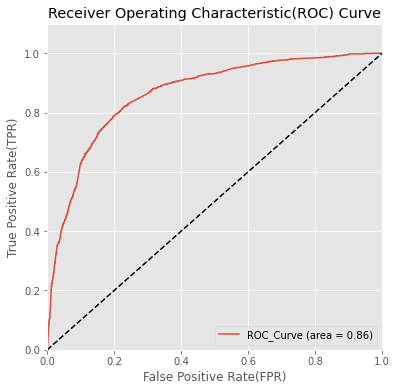

In [101]:
#Plotting ROC
roc_make( y_train_predicted.Converted, y_train_predicted['Conversion Probability'])

##### Checkpoint - It can be inferred from the ROC graph that the area under curve is significant and the curve is leaning towards the upper right corner stating that the model has good predictive power. The ROC curve area is 0.86 indicating stable accuracy.

#### FInding the Optimal Probaility Cutoff

##### Previously we had taken a random probability cutoff at 0.5, but we should finalize a cutoff based on a more pragmatic approach

In [102]:
# Columns creation with different probability cutoffs 
cutoffs = [float(x)/10 for x in range(10)]
for i in cutoffs:
    y_train_predicted[i]= y_train_predicted['Conversion Probability'].map(lambda x: 1 if x > i else 0)
y_train_predicted.head()

,Converted,Conversion Probability,Prospect Id,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.232646,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.028712,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.355167,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.881940,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.823859,7987,1,1,1,1,1,1,1,1,1,1,0


In [103]:
# Calculating accuracy, sensitivity and specificity for the different probability cutoffs.
df_cutoffs = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    con1 = metrics.confusion_matrix(y_train_predicted.Converted, y_train_predicted[i] )
    total=sum(sum(con1))
    Accuracy = (con1[0,0]+con1[1,1])/total
    Specificity = con1[0,0]/(con1[0,0]+con1[0,1])
    Sensitivity = con1[1,1]/(con1[1,0]+con1[1,1])
    df_cutoffs.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(df_cutoffs)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.579436     0.972608     0.333163
0.2          0.2  0.711541     0.913328     0.585147
0.3          0.3  0.762400     0.868357     0.696031
0.4          0.4  0.800976     0.750204     0.832778
0.5          0.5  0.798457     0.668847     0.879641
0.6          0.6  0.772949     0.544971     0.915749
0.7          0.7  0.754527     0.457890     0.940333
0.8          0.8  0.732483     0.358953     0.966453
0.9          0.9  0.691860     0.221586     0.986428


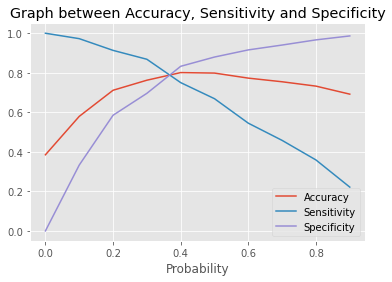

In [104]:
# Plotting the Accuracy, Sensitivity and Specificity for different probabilities.
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.title("Graph between Accuracy, Sensitivity and Specificity")
plt.show()

##### Checkpoint - It can be inffered that the optimal probability cutoff is where all three curves are intersecting at 0.37 approximately

In [105]:
#Adding new prediction according to cutoff probability as 0.3
y_train_predicted['Final_Predict'] = y_train_predicted['Conversion Probability'].map( lambda x: 1 if x > 0.37 else 0)
y_train_predicted.head()

,Converted,Conversion Probability,Prospect Id,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predict
0,0,0.232646,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.028712,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.355167,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.881940,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.823859,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [106]:
#Calculating the Lead Score
y_train_predicted['Lead_Score'] = y_train_predicted['Conversion Probability'].map( lambda x: round(x*100))

In [107]:
y_train_predicted.head()

,Converted,Conversion Probability,Prospect Id,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predict,Lead_Score
0,0,0.232646,3009,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.028712,1012,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0.355167,9226,0,1,1,1,1,0,0,0,0,0,0,0,36
3,1,0.881940,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.823859,7987,1,1,1,1,1,1,1,1,1,1,0,1,82


In [108]:
#Checking Model Accuracy again
metrics.accuracy_score(y_train_predicted.Converted, y_train_predicted.Final_Predict)

0.7971972917650764

In [109]:
confusionm = metrics.confusion_matrix(y_train_predicted.Converted, y_train_predicted.Final_Predict)
confusionm

array([[3166,  739],
       [ 549, 1897]], dtype=int64)

In [110]:
# True positives
TP = confusionm[1,1]
# True negatives
TN = confusionm[0,0] 
# False positives
FP = confusionm[0,1]
# False negatives
FN = confusionm[1,0] 

In [111]:
# Checking model sensitivity
TP / float(TP+FN)

0.7755519215044971

In [112]:
# Checking model specificity
TN / float(TN+FP)

0.8107554417413573

In [113]:
# Checking False Postive Rate again
FP/ float(TN+FP)

0.18924455825864275

In [114]:
# Checking Positive predictive value 
TP / float(TP+FP)

0.7196509863429439

In [115]:
# Checking Negative predictive value
TN / float(TN+ FN)

0.852220726783311

##### Checkpoint - The model is performing well with an ROC area of value 0.86. The other indicative parameters of the model are -
- Accuracy = 79.71%
- Sensitivity = 77.55%
- Specificity = 81.05%

#### Precision Recall Curve

In [116]:
# Checking for the tradeoff between precision and recall
y_train_predicted.Converted, y_train_predicted.Final_Predict
p, r, thresholds = precision_recall_curve(y_train_predicted.Converted, y_train_predicted['Conversion Probability'])

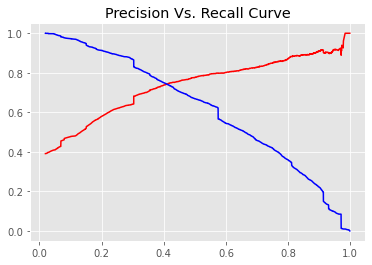

In [117]:
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.title("Precision Vs. Recall Curve")
plt.show()

##### It can be noticed that there is a high area under the curve that represent a high precision and recall respectively.

#### Predictions on the Test Dataset

In [118]:
# Scaling X_test
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [119]:
#Using features from final model
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,-0.600595,0,0,0,0,0,0,0,0,0,0
1490,1.887326,0,0,0,0,0,0,0,0,0,0
7936,-0.752879,0,0,0,0,0,0,0,0,0,0
4216,-0.888650,1,0,0,0,0,0,0,0,1,0
3830,-0.587751,0,0,0,0,0,0,0,0,0,0


In [120]:
#Adding a constant
X_test_final = sm.add_constant(X_test)

In [121]:
y_test_predict = res.predict(X_test_final)
y_test_predict

3271    0.154561
1490    0.761097
7936    0.133056
4216    0.811096
3830    0.156499
          ...   
850     0.154245
2879    0.099077
6501    0.871702
7155    0.136708
376     0.104865
Length: 2723, dtype: float64

In [122]:
# Reshaping y_test_pred
y_test_predict = y_test_predict.values.reshape(-1)

In [123]:
#Creating new dataframe to show actual and predicted values
y_test_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Probability':y_test_predict})
y_test_final['Prospect Id'] = y_test_final.index
y_test_final.head()

,Converted,Conversion_Probability,Prospect Id
0,0,0.154561,0
1,1,0.761097,1
2,0,0.133056,2
3,1,0.811096,3
4,0,0.156499,4


In [124]:
# Based on cut off threshold using accuracy, sensitivity and specificity.
y_test_final['Final_Prediction'] = y_test_final.Conversion_Probability.map(lambda x: 1 if x > 0.37 else 0)
y_test_final.head()

,Converted,Conversion_Probability,Prospect Id,Final_Prediction
0,0,0.154561,0,0
1,1,0.761097,1,1
2,0,0.133056,2,0
3,1,0.811096,3,1
4,0,0.156499,4,0


In [125]:
# Calculating Lead Score
y_test_final['Lead_Score'] = y_test_final.Conversion_Probability.map(lambda x: round(x*100))
y_test_final.head(10)

,Converted,Conversion_Probability,Prospect Id,Final_Prediction,Lead_Score
0,0,0.154561,0,0,15
1,1,0.761097,1,1,76
2,0,0.133056,2,0,13
3,1,0.811096,3,1,81
4,0,0.156499,4,0,16
5,1,0.133543,5,0,13
6,0,0.348478,6,0,35
7,0,0.356004,7,0,36
8,1,0.970341,8,1,97
9,0,0.355167,9,0,36


### <font color = Brown>J. Conclusion

In [126]:
#Calculating Model Accuracy on test data
metrics.accuracy_score(y_test_final.Converted, y_test_final.Final_Prediction)

0.7892030848329049

In [127]:
confusionm = metrics.confusion_matrix(y_test_final.Converted, y_test_final.Final_Prediction)
confusionm

array([[1406,  328],
       [ 246,  743]], dtype=int64)

In [128]:
# True positives
TP = confusionm[1,1]
# True negatives
TN = confusionm[0,0] 
# False positives
FP = confusionm[0,1]
# False negatives
FN = confusionm[1,0] 

In [129]:
# Checking model sensitivity
TP / float(TP+FN)

0.7512639029322548

In [130]:
# Checking model specificity
TN / float(TN+FP)

0.8108419838523645

In [131]:
# Checking False Postive Rate again
FP/ float(TN+FP)

0.18915801614763553

In [132]:
# Checking Positive predictive value 
TP / float(TP+FP)

0.6937441643323996

In [133]:
# Checking Negative predictive value
TN / float(TN+ FN)

0.851089588377724

#### It can thus be concluded that the final model has a sensitivity of 75.16% which is an indicator of converted leads being identified about 75.16% correctly. Moreover, the values of accuracy, sensitivity and specificity are quite close in the train and test data set that shows that the model is a good fit and there is no case of overfitting. For the test data set the accuracy, sensitivity and specificity were 78.92%, 75.16% and 81.08% respectively.

### Recommendations

#### The lead origins from lead add form, lead  import and olark chat seem to have significance on the lead being converted. Moreover the amount of time lead spends on website is a good indicator too. Moreover their last activity like EMail Bounced, Had a phone conversation, sms sent are aso indicators having significance in explaining whether the lead will convert or not. Finally, the last notable activity as modified and olark chat converstaion also have significance on conversion.